# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from config import pyowm_Key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
clmNames = ['City', 'Country']
cityDF = pd.DataFrame(columns=clmNames)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# Remove duplicates
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
# create DataFrame from cities
ctyData = pd.DataFrame({'City':cities})
ctyData.head()

,City
0,kapaa
1,constitucion
2,mataura
3,illoqqortoormiut
4,vaini


In [4]:
# Open weather Url 
url = 'http://api.openweathermap.org/data/2.5/weather?'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Empty List for Data Storage from API call
cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

# Create Dataframe for storing query
dtaColmn = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']
dfCity = pd.DataFrame(columns=dtaColmn)

# Counter start
rowCnt = 1

# print first line of code
print('Beginning Data Retrieval\n-------------------------------')
# cCycle through the data and pull Json request
for index, row in ctyData.iterrows():
    rowCnt += 1
    owmUrl = url + 'appid=' + pyowm_Key + '&units=IMPERIAL' +  '&q=' + row['City']
    cityDF = requests.get(owmUrl).json()
# Verify data is available for query with if  
    if cityDF['cod'] == '404':
        print('City not found Skipping...')
    else:
        response = cityDF
        cityName.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        cityRcrd = response['name']
        print(f'Processing Record {rowCnt} | {cityRcrd}')

Beginning Data Retrieval
-------------------------------
Processing Record 2 | Kapaa
Processing Record 3 | Constitucion
Processing Record 4 | Mataura
City not found Skipping...
Processing Record 6 | Vaini
Processing Record 7 | Ballina
Processing Record 8 | Ushuaia
Processing Record 9 | Bluff
Processing Record 10 | Talnakh
Processing Record 11 | Salalah
City not found Skipping...
Processing Record 13 | Hilo
Processing Record 14 | Mar del Plata
Processing Record 15 | Laerdalsoyri
City not found Skipping...
Processing Record 17 | Aksarka
Processing Record 18 | Nouadhibou
Processing Record 19 | East London
Processing Record 20 | Whitehorse
Processing Record 21 | Qaanaaq
Processing Record 22 | Nikolskoye
Processing Record 23 | Bambous Virieux
Processing Record 24 | Tokmak
Processing Record 25 | Rikitea
Processing Record 26 | Uva
Processing Record 27 | Santiago
Processing Record 28 | Nivala
Processing Record 29 | Busselton
Processing Record 30 | Tual
Processing Record 31 | Port Alfred
Proces

Processing Record 252 | Modasa
Processing Record 253 | Geraldton
Processing Record 254 | Carlsbad
Processing Record 255 | Boromo
Processing Record 256 | Ponta do Sol
Processing Record 257 | Bandarbeyla
Processing Record 258 | Baykit
Processing Record 259 | Lata
Processing Record 260 | Coihueco
Processing Record 261 | Hovd
Processing Record 262 | Tezu
Processing Record 263 | Virginia Beach
Processing Record 264 | Nieuw Nickerie
Processing Record 265 | Esperance
Processing Record 266 | Avanigadda
Processing Record 267 | Tuatapere
Processing Record 268 | Gejiu
City not found Skipping...
Processing Record 270 | Kruisfontein
Processing Record 271 | Ilula
Processing Record 272 | Richards Bay
Processing Record 273 | Mitsamiouli
Processing Record 274 | Coshocton
Processing Record 275 | Cidreira
Processing Record 276 | Pombas
Processing Record 277 | Bacolod
Processing Record 278 | Shimoda
Processing Record 279 | Mahebourg
Processing Record 280 | Upernavik
Processing Record 281 | Warrington
City

Processing Record 505 | Sungurlu
Processing Record 506 | Tazovskiy
Processing Record 507 | Poddorye
City not found Skipping...
Processing Record 509 | Rawson
Processing Record 510 | Waingapu
City not found Skipping...
Processing Record 512 | San Onofre
Processing Record 513 | Hami
Processing Record 514 | Polovinnoye
Processing Record 515 | Gat
Processing Record 516 | Mapimi
Processing Record 517 | Rosarito
Processing Record 518 | Yining
Processing Record 519 | Prince Rupert
Processing Record 520 | Bonfim
Processing Record 521 | Bremervorde
City not found Skipping...
City not found Skipping...
Processing Record 524 | Henties Bay
Processing Record 525 | Alice Springs
Processing Record 526 | Waipawa
Processing Record 527 | Pitimbu
Processing Record 528 | Oriximina
Processing Record 529 | Nago
Processing Record 530 | Magaria
Processing Record 531 | Zhezkazgan
Processing Record 532 | Dourbali
Processing Record 533 | Batagay
Processing Record 534 | Velizh
Processing Record 535 | Evensk
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Data frame for Ploting information
wthrDic = {
    'City':cityName, 
    'Cloudiness':cloudiness, 
    'Country':country, 
    'Date':date, 
    'Humidity':humidity, 
    'Lat':lat, 
    'Lng':lng, 
    'Max Temp':maxTemp, 
    'Wind Speed':windSpeed
}

# Data Frame from Dict
wthrDF = pd.DataFrame(wthrDic)

# Data frame count
wthrDF.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [7]:
#Display data fram head 
wthrDF.to_csv(output_data_file)
wthrDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,20,US,1553272298,73,22.08,-159.32,71.60,11.41
1,Constitucion,5,MX,1553272216,26,23.99,-104.67,64.00,5.82
2,Mataura,64,NZ,1553272207,89,-46.19,168.86,61.00,2.71
3,Vaini,0,IN,1553272353,70,15.34,74.49,68.83,2.93
4,Ballina,0,IE,1553272384,57,54.11,-9.15,48.20,20.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

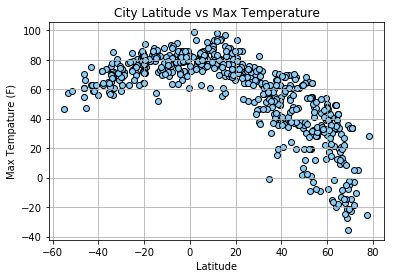

In [27]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Max Temp'], marker='o', facecolors='lightskyblue', edgecolors='black')

# grap Lables
plt.title('City Latitude vs Max Temperature')
plt.ylabel('Max Tempature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('MaxTemp_Lat.png')
# plot figure
plt.show()

#### Latitude vs. Humidity Plot

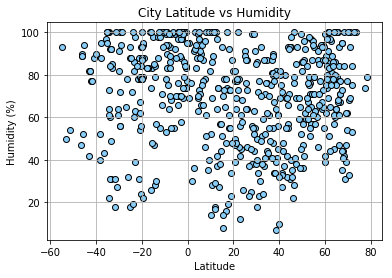

In [28]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Humidity'], marker='o', facecolors='lightskyblue', edgecolors='black')

# grap Lables
plt.title('City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_Humidity.png')
# plot figure
plt.show()

#### Latitude vs. Cloudiness Plot

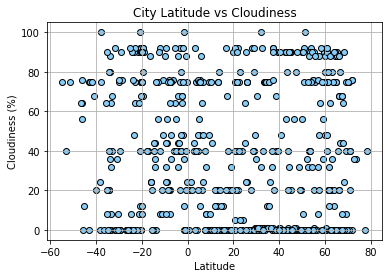

In [29]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Cloudiness'], marker='o', facecolors='lightskyblue', edgecolors='black')

# grap Lables
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_Cloudiness.png')
# plot figure
plt.show()

#### Latitude vs. Wind Speed Plot

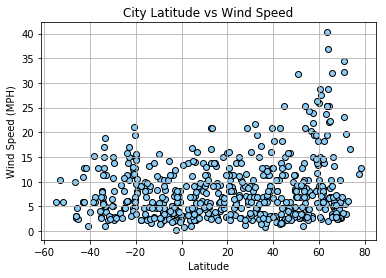

In [30]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Wind Speed'], marker='o', facecolors='lightskyblue', edgecolors='black')

# grap Lables
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_WindSpeed.png')
# plot figure
plt.show()